In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the iris dataset from CSV
df = pd.read_csv('/content/iris.csv')
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)
# Check for null values in each column and drop them
print("Null values in each column:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("Shape after dropping null values:", df.shape)

# Check for duplicate rows and drop them
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

# Display the first 5 rows of the dataset
print("First 5 rows:")
print(df.head())

# Display the last 5 rows of the dataset
print("Last 5 rows:")
print(df.tail())

# Display descriptive statistics of the dataset
print("Descriptive statistics:")
print(df.describe())

# Print the column names
print("Column names:")
print(df.columns)
print("\n\n")
# Print unique values in the target column (assuming the target column is named 'species')
print("Unique target values:")
print(df['target'].unique())


Shape of the dataset: (150, 5)
Null values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64
Shape after dropping null values: (150, 5)
Number of duplicate rows: 3
Shape after dropping duplicates: (147, 5)
First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
Last 5 rows:
     sepal_length  sepal_width  petal_length  petal_width  target
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4      

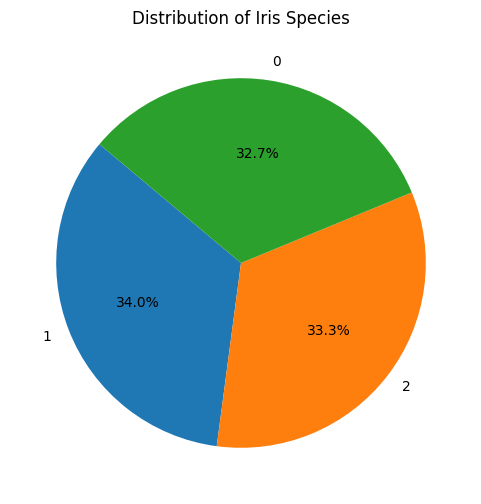

In [ ]:
# Pie Chart for target distribution
target_counts = df['target'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.show()


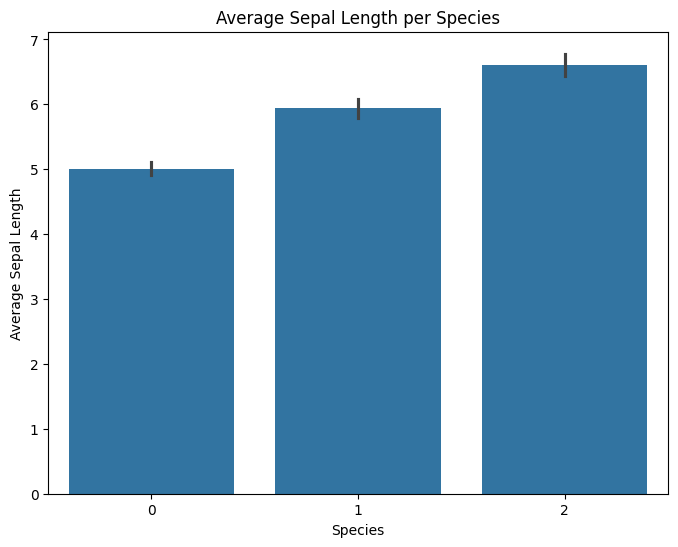

In [ ]:
# Bar Graph for Average Sepal Length per Species
plt.figure(figsize=(8,6))
sns.barplot(x='target', y='sepal_length', data=df)
plt.title('Average Sepal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length')
plt.show()


In [ ]:
# Define features and target variable
# Assuming features are all columns except 'species'
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (102, 4)
Shape of X_test: (45, 4)


In [ ]:
# Define the SVM model (using a linear kernel; you can change to 'rbf' or other kernels if desired)
svm_model = SVC(kernel='linear', random_state=42)

In [ ]:
# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[17  0  0]
 [ 0 11  1]
 [ 0  0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777
Precision: 0.9790849673202615
Recall: 0.9777777777777777
F1 Score: 0.9776313863270385


In [ ]:
# Perform 5-fold cross-validation on the whole dataset
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.96666667 1.         0.96551724 0.96551724 1.        ]
Mean Cross-Validation Score: 0.9795402298850575


In [ ]:
from collections import Counter
Counter(df.target)

Counter({0: 48, 1: 50, 2: 49})

In [ ]:
# Parameter Tuning
model = SVC(C=0.1)# c=0.1
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8666666666666667

In [ ]:
#gamma
model = SVC(gamma=0.01)# gamma=0.01
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8888888888888888

In [ ]:
model = SVC(kernel='poly')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9777777777777777

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


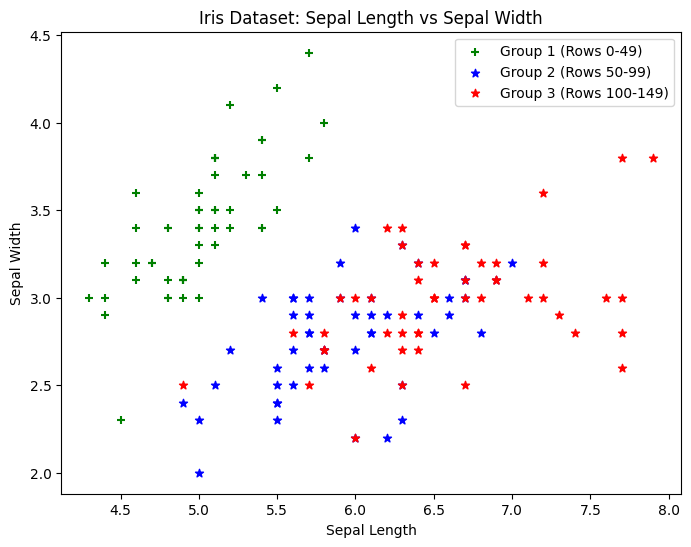

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the iris dataset from CSV file
data = pd.read_csv('/content/iris.csv')
print("First 5 rows of the dataset:")
print(data.head())

# Visualisation:
# Splitting the dataset into three parts (assumed order: first 50 = one species, next 50 = another, final 50 = third)
df0 = data[:50]
df1 = data[50:100]
df2 = data[100:150]

# Optional: Extracting features and target (first 100 rows, first 2 columns and target)
# Adjust 'target' if your CSV column is named differently (e.g., 'species')
x = data.iloc[:100, :2]
y = data['target'][:100]

# Plotting the scatter plots for the three groups
plt.figure(figsize=(8,6))
plt.scatter(df0['sepal_length'], df0['sepal_width'], color='green', marker='+', label='Group 1 (Rows 0-49)')
plt.scatter(df1['sepal_length'], df1['sepal_width'], color='blue', marker='*', label='Group 2 (Rows 50-99)')
plt.scatter(df2['sepal_length'], df2['sepal_width'], color='red', marker='*', label='Group 3 (Rows 100-149)')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.legend()
plt.show()


**EXPx07**

In [ ]:
#import packages
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
data.shape


(150, 5)

In [ ]:
data.target.unique()

array([0, 1, 2])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


In [ ]:
from collections import Counter
Counter(data.target)

Counter({0: 50, 1: 50, 2: 50})

In [ ]:
df.target.value_counts()

,count
target,
0,50
1,50
2,50


In [ ]:
X = data.iloc[:,:-1]
y = data[['target']]